图像边缘特征检测程序

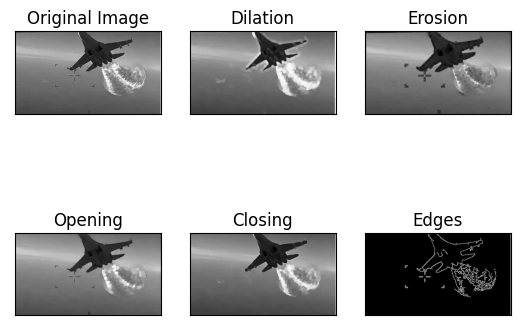

In [8]:
from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('test_img.png', 0)

# 形态学运算：膨胀、腐蚀、开运算、闭运算
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)
erosion = cv2.erode(img, kernel, iterations=1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# 边缘检测：Canny算法
edges = cv2.Canny(img, 100, 200)

# 显示图像
titles = ['Original Image', 'Dilation', 'Erosion', 'Opening', 'Closing', 'Edges']
images = [img, dilation, erosion, opening, closing, edges]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


图像去噪程序

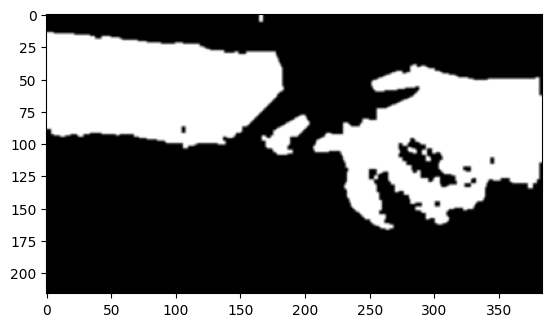

In [11]:
from cv2 import cv2
import numpy as np

img = cv2.imread('test_img.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

blur = cv2.GaussianBlur(closing, (3,3), 0)

import matplotlib.pyplot as plt

plt.imshow(blur, cmap='gray')
plt.show()




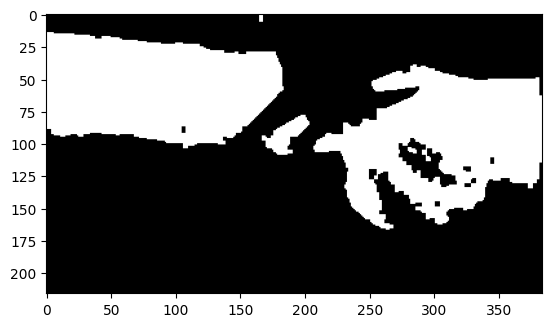

In [16]:
from cv2 import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
img = cv2.imread('test_img.png')

# 将图像转换为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 对灰度图像进行二值化
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 定义结构元素
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# 对二值化图像进行形态学开操作，去除噪点
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# 对开操作结果进行形态学闭操作，填补空洞
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# 展示图像
plt.imshow(closed, cmap='gray')
plt.show()


实现车牌与背景分割

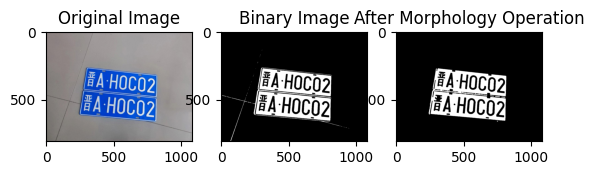

In [9]:
from cv2 import cv2
import matplotlib.pyplot as plt

# 读取车牌图像
img = cv2.imread('pure.jpeg')
# 将图像转换为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 对灰度图像进行二值化
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
# 定义结构元素
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# 对二值化图像进行形态学开操作
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
# 对开操作结果进行形态学闭操作
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# 显示处理后的车牌图像和二值化图像
plt.subplot(131)
plt.imshow(img[..., ::-1])
plt.title('Original Image')
plt.subplot(132)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.subplot(133)
plt.imshow(closed, cmap='gray')
plt.title('After Morphology Operation')
plt.show()


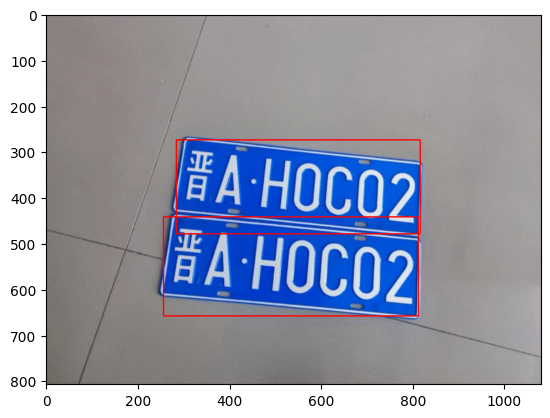

In [10]:
from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并转换为灰度图
img = cv2.imread('pure.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 对灰度图进行二值化处理
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 对二值化图像进行形态学处理，去除噪声和小的不连通区域
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 查找并绘制车牌轮廓
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plate_contour = None
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # if 2 < w / h < 8 and w > 100 and h > 20:
    if 2 < w / h < 8 and w > 50 and h > 20:
        plate_contour = contour
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

# 展示处理结果
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


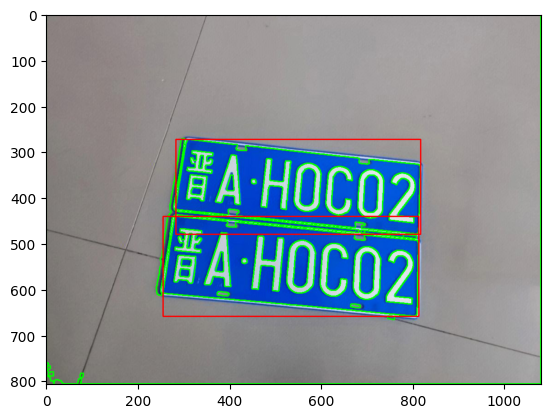

In [11]:
from cv2 import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图片
img = cv2.imread('pure.jpeg')

# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 形态学操作
kernel = np.ones((3,3), np.uint8)
kernel2 = np.ones((5,5), np.uint8)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel2, iterations=1)

opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)


# 查找轮廓
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# 绘制检测到的轮廓
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

plate_contour = None
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # if 2 < w / h < 8 and w > 100 and h > 20:
    if 2 < w / h < 8 and w > 50 and h > 20:
        plate_contour = contour
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

# 显示结果
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


（4）利用Python语言环境编写实现车牌分割的程序，实现车牌定位方法和车牌字符的分割。

10


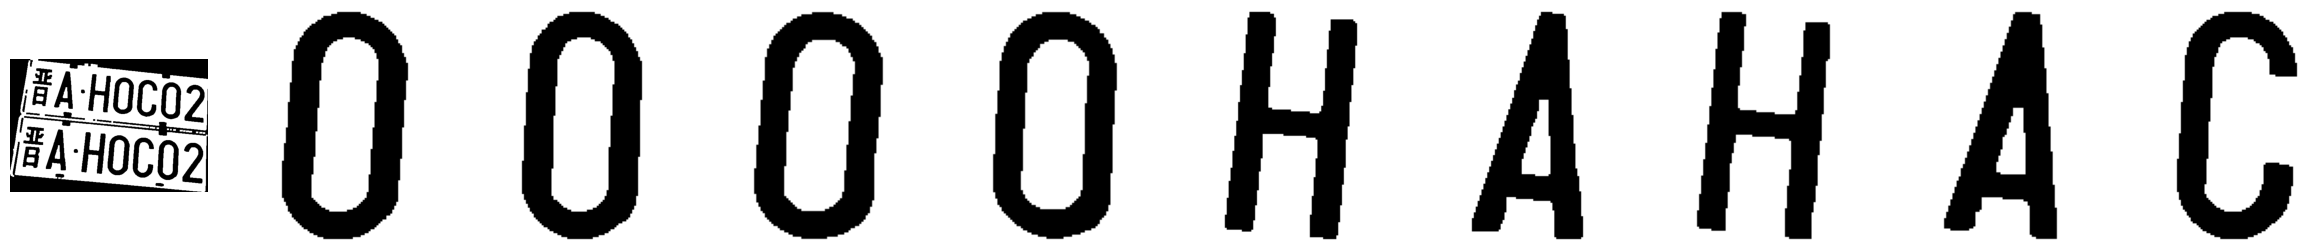

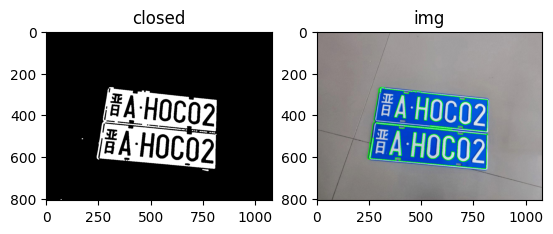

In [7]:
from cv2 import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取车牌图像
img = cv2.imread('pure.jpeg')

# 将图像转换为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 对灰度图像进行二值化
# ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

# 形态学操作
kernel = np.ones((3,3), np.uint8)
kernel2 = np.ones((5,5), np.uint8)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel2, iterations=1)

closed = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)


# 查找轮廓
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
screenCnt = None

# for c in contours:
#     x, y, w, h = cv2.boundingRect(c)
#     if w / h > 1.5 and w < 800 and 10 < h < 300:
#         screenCnt = c
#         break

chars = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    # if w / h > 1.5 and w < 350 and 10 < h < 100:
    if not (2 < w / h < 8 and w > 50 and h > 20):
        char_img = closed[y:y+h, x:x+w]
        chars.append(char_img)

print(len(chars))
fig, ax = plt.subplots(1, len(chars), figsize=(len(chars)*3, 3))
for i, char in enumerate(chars):
    ax[i].imshow(char, cmap='gray')
    ax[i].axis('off')
plt.show()

# 绘制车牌区域轮廓
# cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# 显示处理结果
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(closed, cv2.COLOR_BGR2RGB))
plt.title('closed')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('img')
plt.show()


(6)

In [3]:
from cv2 import cv2
import torch
import numpy as np

# 车牌字符类别
CHARS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# 加载车牌字符识别模型
model = torch.load('char_recognition_model.pt', map_location=torch.device('cpu'))

# 对车牌字符进行预处理
def preprocess_character(char_img):
    # 将图像调整为模型输入大小
    char_img = cv2.resize(char_img, (20, 20), interpolation=cv2.INTER_AREA)
    # 将图像转换为单通道灰度图
    char_img = cv2.cvtColor(char_img, cv2.COLOR_BGR2GRAY)
    # 将图像像素值转换为浮点数，并除以 255 进行归一化
    char_img = char_img.astype(np.float32) / 255.
    # 将图像转换为 PyTorch 张量
    char_img = torch.from_numpy(char_img).unsqueeze(0).unsqueeze(0)
    return char_img

# 对车牌字符进行识别
def recognize_characters(char_imgs):
    chars = ''
    with torch.no_grad():
        # 对每个字符图像进行识别
        for char_img in char_imgs:
            # 对字符图像进行预处理
            char_img = preprocess_character(char_img)
            # 将字符图像输入模型进行推理
            output = model(char_img)
            # 获取预测结果
            _, predicted = torch.max(output.data, 1)
            # 将预测结果添加到识别结果字符串中
            chars += CHARS[predicted]
    return chars

# 加载车牌图像
img = cv2.imread('pure.jpeg')

# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# 腐蚀和膨胀
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# 定位车牌区域
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
screenCnt = None

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w / h > 1.5 and w < 350 and 10 < h < 100:
        screenCnt = c
        break

# 分割车牌字符
if screenCnt is not None:
    # 获取车牌区域的最小外接矩形
    rect = cv2.minAreaRect(screenCnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    # 用四个顶点坐标创建透视变换矩阵
    width, height = int(rect[1][0]), int(rect[1][1])
    src_pts = box.astype("float32")
    dst_pts = np.array([[0, height-1], [0, 0], [width-1, 0], [width-1, height-1]], dtype="float32")
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    # 对车牌进行透视变换
    warped = cv2.warpPerspective(img, M, (width, height))
    # 将透视变换后的车牌图像转换为单通道灰度图
    warped_gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    # 对车牌字符进行分割
    char_imgs = []
    _, thresh = cv2.threshold(warped_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if h / w > 2 and h < height - 5:
            char_img = warped_gray[y:y+h, x:x+w]
            char_imgs.append(char_img)
    # 对车牌字符进行识别
    plate_chars = recognize_characters(char_imgs)
    # 输出识别结果
    print('识别结果：', plate_chars)
else:
    print('未能定位到车牌区域')



FileNotFoundError: [Errno 2] No such file or directory: 'char_recognition_model.pt'